In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm

In [2]:
xi,xf=-2,1.2 #domain in space
yi,yf=-1,2
x,y=np.linspace(xi,xf,200),np.linspace(yi,yf,200)

In [3]:
A=np.array([-200,-100,-170,15]) #definition of constants
a=np.array([-1,-1,-6.5,0.7])
b=np.array([0,0,11,0.6])
c=np.array([-10,-10,-6.5,0.7])
x0=np.array([1,0,-0.5,-1])
y0=np.array([0,0.5,1.5,1])

In [4]:
V=np.zeros([len(y),len(x)])
for i in range(len(y)):
    for j in range(len(x)):
        for k in range(4):
            V[i,j]=V[i,j]+A[k]*np.exp(a[k]*(x[j]-x0[k])**2+b[k]*(x[j]-x0[k])*(y[i]-y0[k])+c[k]*(y[i]-y0[k])**2)

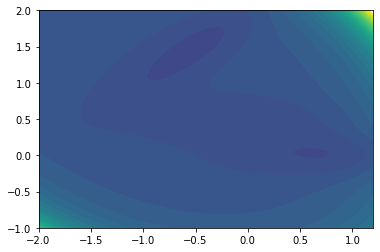

In [5]:
X,Y= np.meshgrid(x,y)
levels=np.arange(-1000,3000,100)
potplot=plt.contourf(X,Y,V,levels=levels)
plt.show(potplot)

In [6]:
#Vx,Vy=np.gradient(V)
alpha=1 #coupling
beta=1 #noise
T=np.geomspace(5,60,10) #temperature
ti,tf=0,10 #start and end time
dt=10**(-4) #time step
t=np.arange(ti,tf,dt)
xt,yt=np.zeros([len(T),len(t)]),np.zeros([len(T),len(t)])

In [7]:
X0,Y0=np.random.uniform(xi,xf),np.random.uniform(yi,yf) #initial position
Vx,Vy=0,0
for j in range(len(T)):
    xt[j,0],yt[j,0]=X0,Y0
    dWx=np.random.normal(0,np.sqrt(dt),len(t))
    dWy=np.random.normal(0,np.sqrt(dt),len(t))
    for i in range(len(t)-1):
        for k in range(4):
            Vx=Vx+A[k]*np.exp(a[k]*(xt[j,i]-x0[k])**2+b[k]*(xt[j,i]-x0[k])*(yt[j,i]-y0[k])+c[k]*(yt[j,i]-y0[k])**2)*(2*a[k]*(xt[j,i]-x0[k])+b[k]*(yt[j,i]-y0[k]))
            Vy=Vy+A[k]*np.exp(a[k]*(xt[j,i]-x0[k])**2+b[k]*(xt[j,i]-x0[k])*(yt[j,i]-y0[k])+c[k]*(yt[j,i]-y0[k])**2)*(2*c[k]*(yt[j,i]-y0[k])+b[k]*(xt[j,i]-x0[k]))
        xt[j,i+1]=xt[j,i]-alpha*Vx*dt+np.sqrt(beta*T[j])*dWx[i]
        yt[j,i+1]=yt[j,i]-alpha*Vy*dt+np.sqrt(beta*T[j])*dWy[i]
        Vx,Vy=0,0

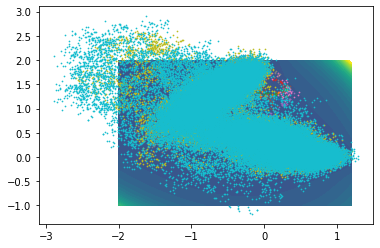

In [8]:
X,Y= np.meshgrid(x,y)
levels=np.arange(-1000,3000,100)
labels=[]
plt.contourf(X,Y,V,levels=levels)
for i in range(len(T)):
    plt.scatter(xt[i],yt[i], s=0.5)
    labels.append(r'$k_BT = %i$' % (T[i]))
    
# plt.legend(labels)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<Figure size 960x800 with 0 Axes>

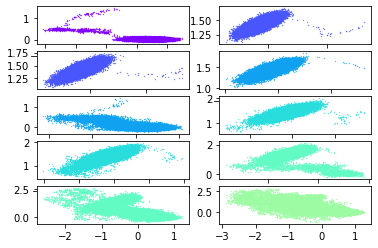

In [9]:
X,Y= np.meshgrid(x,y)
levels=np.arange(-1000,3000,100)
labels=[]
#plt.contourf(X,Y,V,levels=levels)
figure(figsize=(12, 10), dpi=80)
fig, ax = plt.subplots(5,2)
colors = cm.rainbow(np.linspace(0, 1, len(T)))
index = 0
for i in range(int(len(T)/2)):
    for j in range(2):
        ax[i,j].scatter(xt[index],yt[index], s= 0.1, c=colors[i+j])
        index += 1
        #labels.append(r'$k_BT = %i$' % (T[i]))
    
plt.savefig('scatters.png', dpi=300, bbox_inches='tight')

In [10]:
xdata=xt.reshape(1,-1)
ydata=yt.reshape(1,-1)
Tt=np.ones([len(T),len(t)])*T.reshape(len(T),1)
Tdata=Tt.reshape(1,-1)
data=np.concatenate([xdata,ydata,Tdata],axis=0).T
np.save('/home/omar/data.npy', data)

In [11]:
l = np.load('/home/omar/sample_data.npy')
xs = l[:,0]
ys = l[:,1]
xss = []
yss = []

start = 0
npoints = 100000
stop = 100000
for i in range(len(T)):
    xss.append(xs[start:stop:1])
    yss.append(ys[start:stop:1])
    start += npoints
    stop += npoints

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<Figure size 960x800 with 0 Axes>

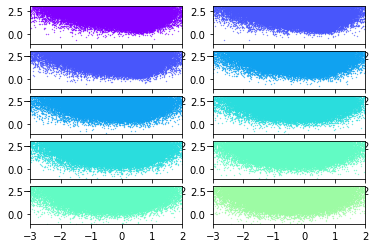

In [12]:
X,Y= np.meshgrid(x,y)
levels=np.arange(-1000,3000,100)
labels=[]
#plt.contourf(X,Y,V,levels=levels)
figure(figsize=(12, 10), dpi=80)
fig, ax = plt.subplots(5,2)
colors = cm.rainbow(np.linspace(0, 1, len(T)))
index = 0

for i in range(int(len(T)/2)):
    for j in range(2):
        ax[i,j].scatter(xss[index],yss[index], s= 0.1, c=colors[i+j])
        ax[i,j].set_xlim(-3,2)
        ax[i,j].set_ylim(-1,3)
        index += 1
        #labels.append(r'$k_BT = %i$' % (T[i]))  
plt.savefig('scatters1.png', dpi=300, bbox_inches='tight')